# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
!pip install kaleido

In [3]:
import plotly.io as pio
pio.renderers.default = "png"

In [4]:
df = pd.read_csv('../data/House_Rent_Dataset.csv')

In [5]:
df.shape

(4746, 12)

In [6]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Завдання 2: Дослідницький аналіз даних (EDA) (5 балів)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [8]:
mis_data = df.isnull().sum()
mis_data_pers = (mis_data/len(df))*100
mis_data_pers

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

In [9]:
stat = df[['BHK', 'Rent', 'Size', 'Bathroom']].describe().round(2)
stat

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


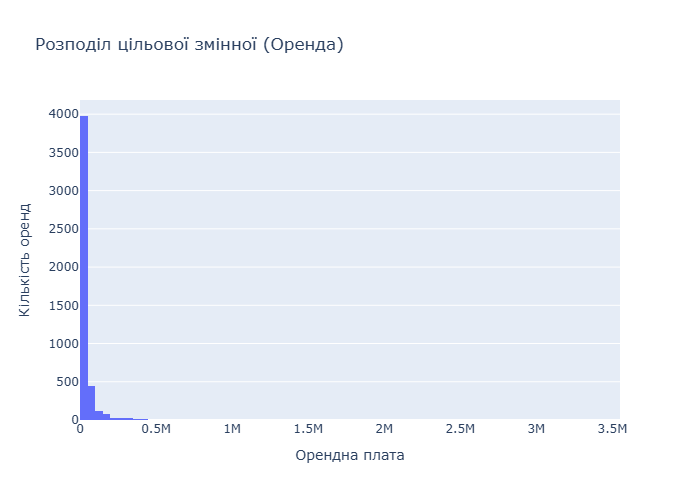

In [10]:
fig = px.histogram(
    df,
    x='Rent',
    nbins=100,
    title='Розподіл цільової змінної (Оренда)',
    labels={'Rent': 'Орендна плата'}
)
fig.update_layout(
    showlegend=False,
    height=500,
    yaxis_title='Кількість оренд'
)
fig.show()

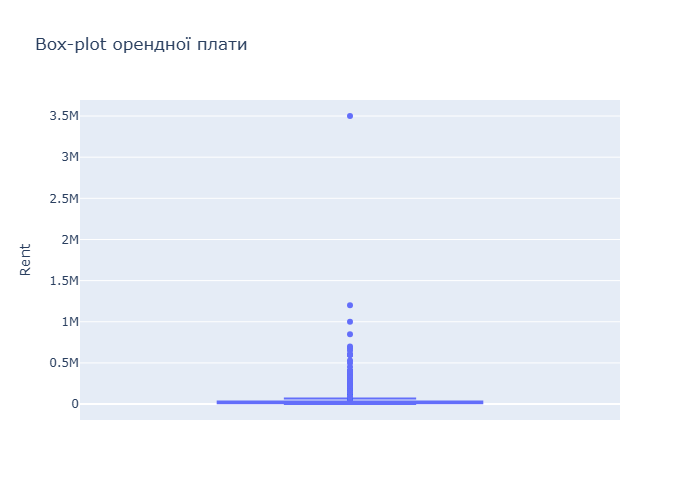

In [11]:
fig = px.box(
    df,
    y = 'Rent',
    title = 'Box-plot орендної плати'
)
fig.update_layout(
    height=800,
)
fig.show()

In [12]:
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['Rent'] >= lower_bound) & (df['Rent'] <= upper_bound)]

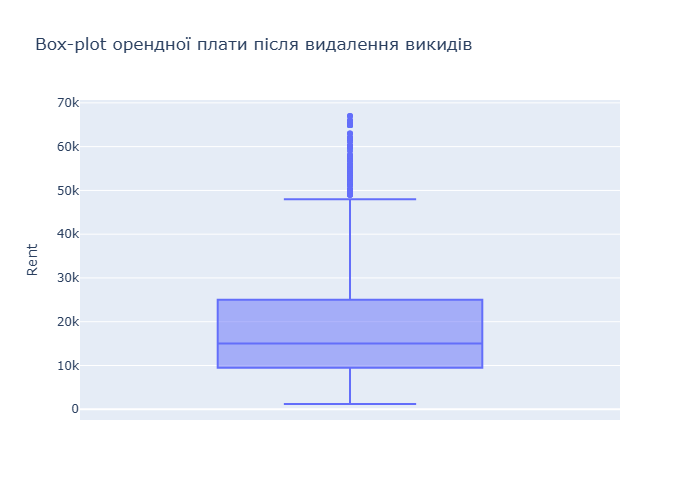

In [13]:
fig = px.box(
    df_clean,
    y = 'Rent',
    title = 'Box-plot орендної плати після видалення викидів'
)
fig.update_layout(
    height=800,
)
fig.show()

In [14]:
df[['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred']].nunique()

Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
dtype: int64


## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


In [15]:
corr = df_clean.select_dtypes(include='number').corr()
corr

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.401268,0.698453,0.747918
Rent,0.401268,1.000000,0.393605,0.506528
Size,0.698453,0.393605,1.000000,0.680607
Bathroom,0.747918,0.506528,0.680607,1.000000


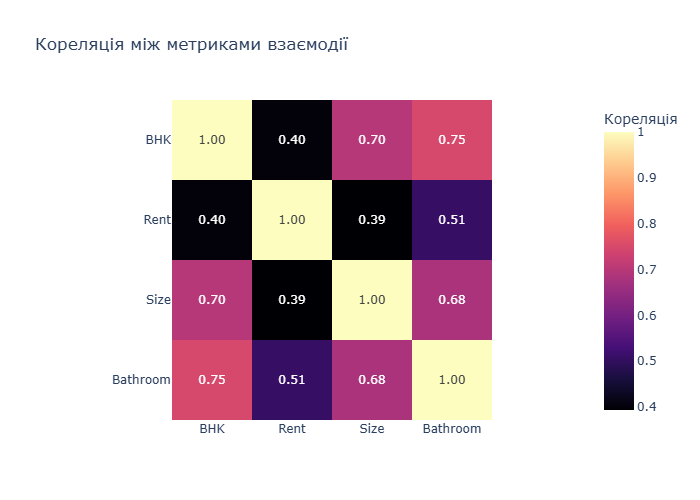

In [16]:
fig = px.imshow(
    corr,
    text_auto='.2f',
    color_continuous_scale='magma',
    title='Кореляція між метриками взаємодії',
    labels=dict(color="Кореляція")
)
fig.update_layout(height=500)
fig.show()

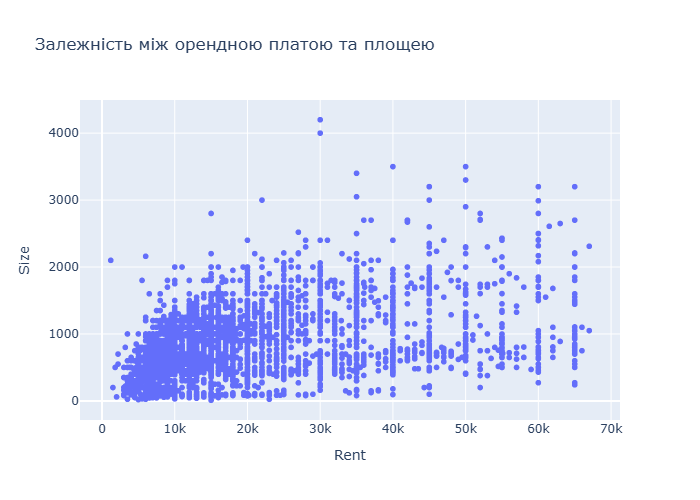

In [17]:
fig = px.scatter(
    df_clean,
    x= 'Rent',
    y = 'Size',
    title='Залежність між орендною платою та площею'
)
fig.update_layout(height=700)
fig.show()

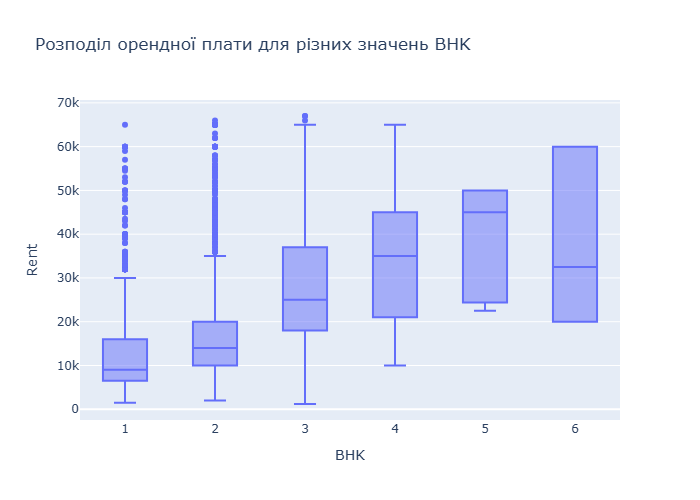

In [18]:
fig = px.box(
    df_clean,
    x='BHK',
    y='Rent',
    title='Розподіл орендної плати для різних значень BHK'
)

fig.update_layout(
    xaxis_title='BHK',
    yaxis_title='Rent',
    boxmode='group',
    height=500
)

fig.show()

Чітко видно монотонне зростання медіани Rent зі збільшенням BHK. Це підтверджує сильний позитивний зв’язок між кількістю кімнат і орендною платою.
Цінові діапазони перекриваються між сусідніми BHK. Це означає, що BHK не є єдиним фактором, що визначає висоту орендної плати.

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [19]:
categorical_cols = [
    'Area Type',
    'City',
    'Furnishing Status',
    'Tenant Preferred'
]

df_dummies = pd.get_dummies(
    df_clean,
    columns=categorical_cols,
    drop_first=True
)

In [20]:
df_dummies['Floor_num'] = df_dummies['Floor'].str.extract(r'(\d+)').astype(float)
df_dummies['Size_per_BHK'] = (df_dummies['Size'] / df_dummies['BHK']).round(2)

In [21]:
df_dummies.drop(columns=[
    'Floor',
    'Area Locality',
    'Posted On',
    'Point of Contact'
], inplace=True)

In [22]:
df_dummies.dropna(inplace=True)

In [23]:
X = df_dummies.drop('Rent', axis=1)
y = df_dummies['Rent']

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [26]:
X_scaled_df.head()

,BHK,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Floor_num,Size_per_BHK
0,0.052665,0.469640,0.272319,-0.878344,0.87919,-0.501848,-0.387263,-0.5,2.660525,-0.408812,-0.940914,1.205629,0.597672,-0.315734,-0.330240,0.604066
1,0.052665,-0.147980,-1.134217,-0.878344,0.87919,-0.501848,-0.387263,-0.5,2.660525,-0.408812,1.062796,-0.829442,0.597672,-0.315734,-0.615103,-0.268710
2,0.052665,0.263767,-1.134217,-0.878344,0.87919,-0.501848,-0.387263,-0.5,2.660525,-0.408812,1.062796,-0.829442,0.597672,-0.315734,-0.615103,0.313141
3,0.052665,-0.147980,-1.134217,-0.878344,0.87919,-0.501848,-0.387263,-0.5,2.660525,-0.408812,-0.940914,1.205629,0.597672,-0.315734,-0.615103,-0.268710
4,0.052665,-0.045043,-1.134217,1.138506,-1.13741,-0.501848,-0.387263,-0.5,2.660525,-0.408812,-0.940914,1.205629,-1.673159,-0.315734,-0.615103,-0.123247


## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.2,
    random_state=42
)

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [30]:
for feature, weight in zip(model.feature_names_in_, model.coef_):
    print(f"{feature}: {weight:.2f}")

print(f"\nЗміщення (intercept): {model.intercept_:.2f}")

BHK: 2171.42
Size: 4515.71
Bathroom: 2043.83
Area Type_Carpet Area: 324.42
Area Type_Super Area: -1002.54
City_Chennai: -633.19
City_Delhi: 1200.65
City_Hyderabad: -1192.19
City_Kolkata: -1071.10
City_Mumbai: 7043.62
Furnishing Status_Semi-Furnished: -1876.65
Furnishing Status_Unfurnished: -2461.05
Tenant Preferred_Bachelors/Family: -757.67
Tenant Preferred_Family: -850.73
Floor_num: 1588.32
Size_per_BHK: -186.88

Зміщення (intercept): 19336.06


На прогноз найбільше впливають розташованість квартири у Мумбаї та її площа.

In [31]:
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, y_train_pred)

print("Метрики якості моделі на тренувальній вибірці:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2_train:.3f}")

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("\nМетрики якості моделі на тестувальній вибірці:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


Метрики якості моделі на тренувальній вибірці:
MAE: 5925.59
RMSE: 8168.66
R²: 0.653

Метрики якості моделі на тестувальній вибірці:
MAE: 5455.84
RMSE: 7845.10
R²: 0.668


Побудована модель лінійної регресії демонструє стабільну якість як на навчальній, так і на тестовій вибірках, що свідчить про відсутність перенавчання.
Значення R² на тестовій вибірці становить 0.668, тобто модель пояснює близько 67% варіації орендної плати.
Середня абсолютна помилка прогнозу складає близько 5500, що є прийнятним результатом для задачі прогнозування оренди нерухомості з використанням лінійної моделі.

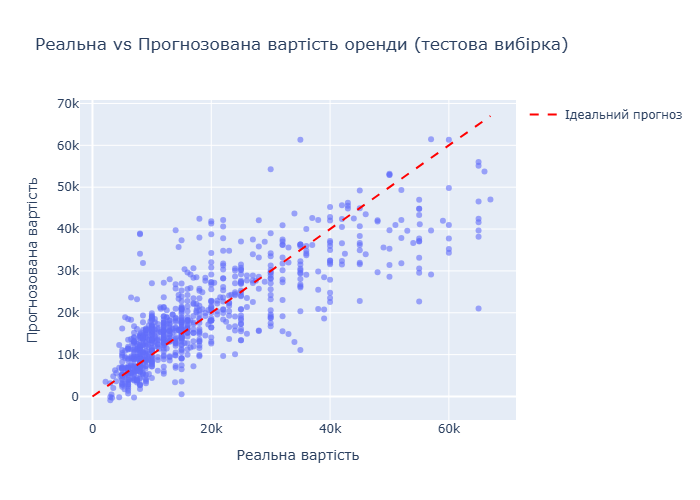

In [33]:
fig = px.scatter(
    x=y_test,
    y=y_test_pred,
    title='Реальна vs Прогнозована вартість оренди (тестова вибірка)',
    labels={'x': 'Реальна вартість', 'y': 'Прогнозована вартість'},
    opacity=0.6
)
max_val = max(y_test.max(), y_test_pred.max())
fig.add_trace(
    go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        name='Ідеальний прогноз',
        line=dict(color='red', dash='dash')
    )
)

fig.update_layout(height=600)
fig.show()

На графіку видно, що загалом модель непогано оцінює вартість оренди житла. Але при збільшенні вартості, прослідковується недооцінка.

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

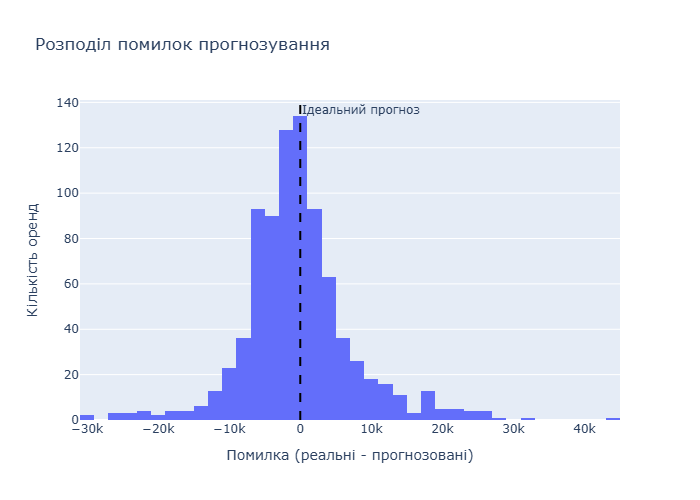

In [34]:
residuals = y_test - y_test_pred

fig = px.histogram(
    x=residuals,
    nbins=50,
    title='Розподіл помилок прогнозування',
    labels={'x': 'Помилка (реальні - прогнозовані)'}
)
fig.add_vline(x=0, line_dash="dash", line_color="black", annotation_text="Ідеальний прогноз")
fig.update_layout(height=500, yaxis_title='Кількість оренд')
fig.show()

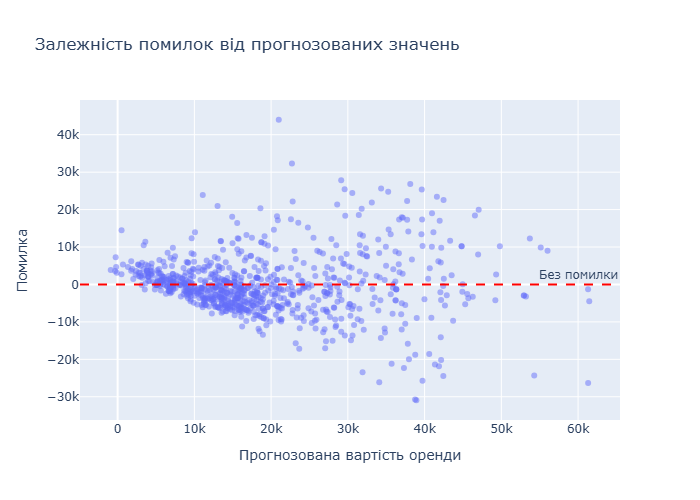

In [35]:
fig = px.scatter(
    x=y_test_pred,
    y=residuals,
    title='Залежність помилок від прогнозованих значень',
    labels={'x': 'Прогнозована вартість оренди', 'y': 'Помилка'},
    opacity=0.5
)

fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="Без помилки")

fig.update_layout(height=500)
fig.show()

З ростом прогнозованого значення росте кількість помилок.

In [36]:
errors = pd.DataFrame({
    'Real': y_test.values,
    'Predict': y_test_pred,
    'Error': np.abs(residuals)})

In [37]:
top_errors = errors.nlargest(5, 'Error')
print("Оренди з найбільшими помилками прогнозування:")
print(top_errors)

Оренди з найбільшими помилками прогнозування:
       Real       Predict         Error
2527  65000  21000.532693  43999.467307
4408  55000  22717.514645  32282.485355
549    8000  38929.353093  30929.353093
852    8000  38762.160303  30762.160303
4374  57000  29133.414749  27866.585251


In [38]:
df_test = df.loc[errors.index].copy()
df_errors = pd.concat([errors, df_test], axis=1)
df_errors.head()

,Real,Predict,Error,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1886,11000,16407.901251,5407.901251,2022-05-19,2,11000,900,2 out of 3,Super Area,T Dasarahalli,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
2776,16000,12722.428499,3277.571501,2022-05-27,1,16000,400,3 out of 4,Carpet Area,Lajpat Nagar 4,Delhi,Semi-Furnished,Bachelors/Family,1,Contact Agent
4427,14000,6893.396348,7106.603652,2022-07-06,1,14000,540,1 out of 5,Carpet Area,Kondapur,Hyderabad,Unfurnished,Bachelors,1,Contact Agent
4647,8000,2662.899045,5337.100955,2022-05-12,1,8000,450,3 out of 3,Super Area,Puppalaguda,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner
2781,21000,22196.360533,1196.360533,2022-07-09,2,21000,600,3 out of 4,Carpet Area,"Arjun Nagar, Safdarjung Enclave",Delhi,Semi-Furnished,Bachelors,2,Contact Agent


In [39]:
bhk_error = (
    df_errors
    .groupby('BHK')['Error']
    .mean()
    .reset_index()
    .sort_values('Error', ascending=False)
)

bhk_error

,BHK,Error
4,6,14919.915613
3,4,10519.420261
2,3,8158.931448
1,2,5039.595935
0,1,4270.668773


In [40]:
city_error = (
    df_errors
    .groupby('City')['Error']
    .mean()
    .reset_index()
    .sort_values('Error', ascending=False)
)

city_error


,City,Error
5,Mumbai,9497.750103
2,Delhi,6022.505829
3,Hyderabad,5622.302920
1,Chennai,4478.337184
0,Bangalore,4306.209949
4,Kolkata,4007.127124


Аналіз помилок моделі показав, що найбільші похибки прогнозу спостерігаються для квартир з більшою кількістю кімнат. Це пояснюється тим, що ціни на великі квартири мають більшу варіативність та сильніше залежать від району й інших нелінійних факторів.

Також модель демонструє більші помилки в таких містах, як Мумбаї та Делі, де високий та неоднорідний ринок нерухомості, а лінійна залежність між ознаками та орендною платою є менш вираженою.

Для покращення якості моделі доцільно, перш за все, трансформувати цільову змінну. Для цього буде потрібно логарифмувати орендну плату, що дозволить зменшити вплив екстремальних значень.

Також доцільно буде використати нелінійні моделі, оскільки ми досліджуємо ринок нерухомості, який не є лінійним.

Ще можна зробити сегментацію задач і створити окремі моделі для різних міст або BHK, що спростить залежності та підвищить точність.